In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
pd.set_option('display.max_columns', 999)
plt.style.use('ggplot')

In [53]:
df_dummy = pd.read_csv('forex_dummy.csv')
df_pca1 = pd.read_csv('forex_pca_1.csv')
df_pca2 = pd.read_csv('forex_pca_2.csv')

In [54]:
df_pca1.dropna(inplace=True)
df_pca2.dropna(inplace=True)

In [55]:
df_pca2.head(3)

,0,1,0.1,1.1,0.2,1.2,2,3,4,5,6,7,8,9,10,ind_40_1,ind_40_2,ind_40_3,ind_40_4,ind_40_5,ind_40_6,ind_217_0,ind_217_1,ind_217_2,ind_217_3,ind_217_4,ind_217_5,90_target,buy
0,-8.438,-1.842,-8.254,-1.776,3.254,0.232,-0.347,2.127,-1.875,3.744,-0.969,1.721,-0.270,-1.269,-0.924,0,0,1,0,0,0,0,1,0,0,0,0,36.998,2
1,-8.930,-1.292,-8.906,-1.555,3.058,-0.515,-0.363,0.474,-2.318,4.679,-0.929,1.725,-0.516,-1.247,-0.657,0,0,1,0,0,0,0,1,0,0,0,0,37.016,2
2,-8.570,0.093,-9.127,-0.983,3.076,-0.908,-0.422,-0.783,-2.258,3.666,-0.483,1.975,-0.630,-1.014,-0.992,0,0,1,0,0,0,0,1,0,0,0,0,37.025,1


In [56]:
df_dms = df_dummy[['buy','ind_40_1','ind_40_2','ind_40_3','ind_40_4','ind_40_5','ind_40_6','ind_217_0','ind_217_1','ind_217_2','ind_217_3','ind_217_4','ind_217_5']]
df_scale = df_dummy.drop(['buy','ind_40_1','ind_40_2','ind_40_3','ind_40_4','ind_40_5','ind_40_6','ind_217_0','ind_217_1','ind_217_2','ind_217_3','ind_217_4','ind_217_5'], axis=1)

#StandardScaler
scale_col = pd.DataFrame(StandardScaler().fit_transform(df_scale),
            columns=df_scale.columns)
dfScale = pd.concat([df_dms, scale_col], axis=1)

#MinMaxScaler
minmax_col = pd.DataFrame(MinMaxScaler().fit_transform(df_scale),
            columns=df_scale.columns)
dfMinMax = pd.concat([df_dms, minmax_col], axis=1)

# Kmeans

In [57]:
from yellowbrick.cluster import KElbowVisualizer

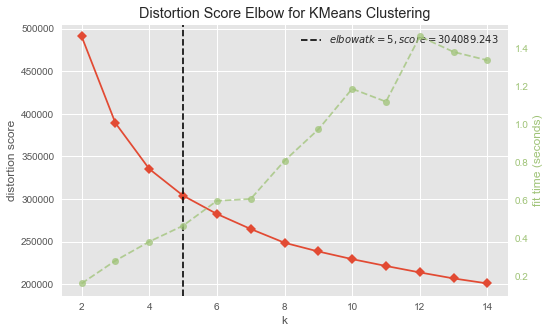

In [60]:
plt.figure(figsize=(8,5))
kmeans = KMeans(random_state = 42)
visualizer = KElbowVisualizer (kmeans, k=(2,15))
visualizer.fit(df_pca1)
visualizer.poof();

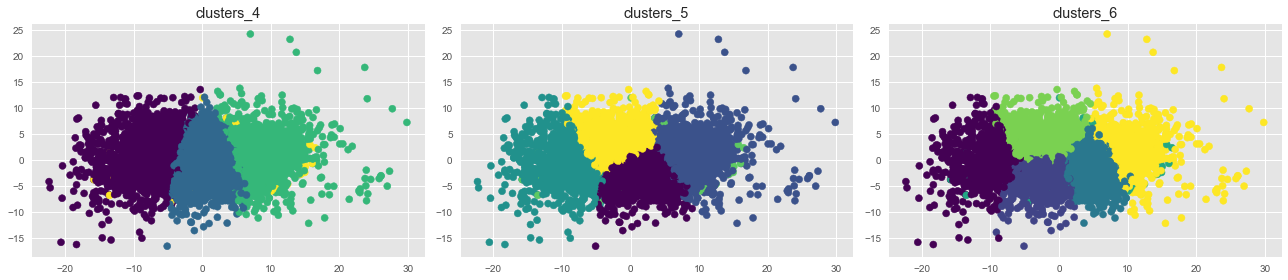

In [47]:
plt.figure(figsize=(18,4))
df_pca1_p1 = pd.DataFrame()
for num, k in enumerate(range(4,7),1):
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca1)
    df_pca1_p1['pred_'+str(k)] = kmeans.labels_
    
    plt.subplot(1, 3, num)
    plt.scatter(df_pca1.iloc[:,0], df_pca1.iloc[:,1], c = df_pca1_p1['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters_'+str(k))
    plt.tight_layout()

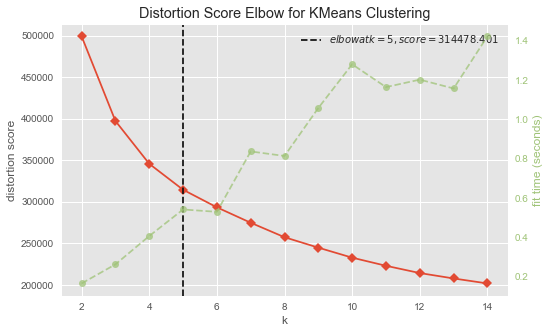

In [61]:
plt.figure(figsize=(8,5))
kmeans = KMeans(random_state = 42)
visualizer = KElbowVisualizer (kmeans, k=(2,15))
visualizer.fit(df_pca2)
visualizer.poof();

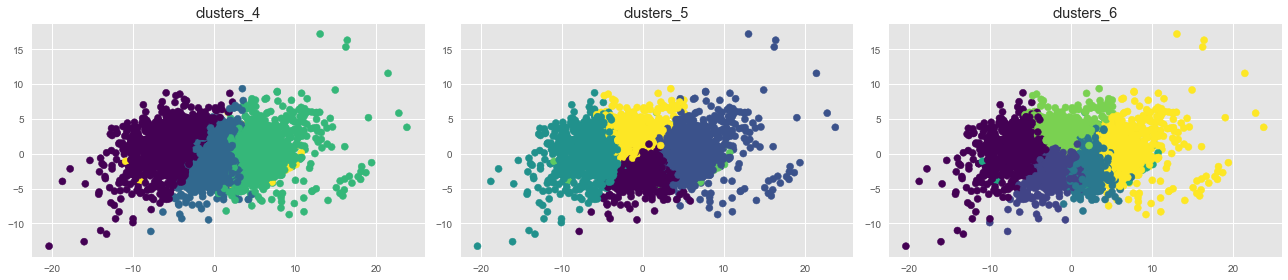

In [51]:
plt.figure(figsize=(18,4))
df_pca2_p2 = pd.DataFrame()
for num, k in enumerate(range(4,7),1):
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca1)
    df_pca2_p2['pred_'+str(k)] = kmeans.labels_
    
    plt.subplot(1, 3, num)
    plt.scatter(df_pca2.iloc[:,0], df_pca2.iloc[:,1], c = df_pca2_p2['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters_'+str(k))
    plt.tight_layout()

# Hierarchy

In [76]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

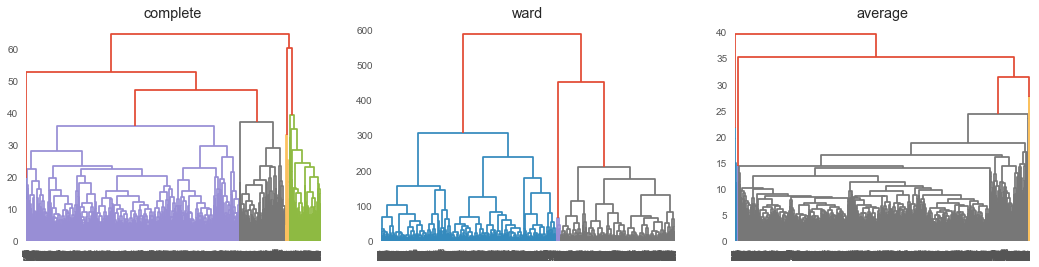

In [77]:
plt.figure(figsize=(18,4))
for num, lk in enumerate(['complete', 'ward', 'average'], 1):
    plt.subplot(1, 3, num)
    dendrogram(linkage(df_pca1, method = lk))
    plt.title(lk)

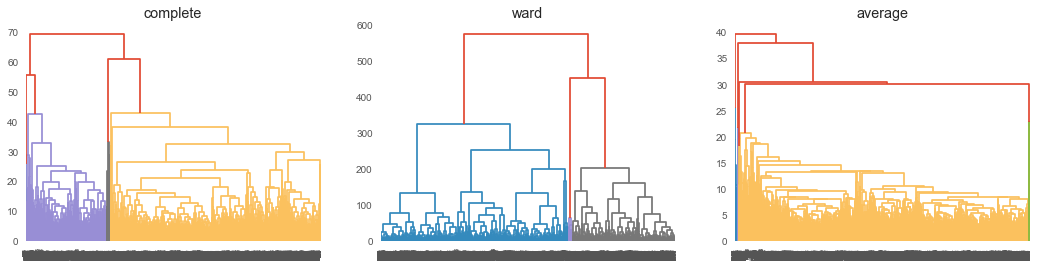

In [78]:
plt.figure(figsize=(18,4))
for num, lk in enumerate(['complete', 'ward', 'average'], 1):
    plt.subplot(1, 3, num)
    dendrogram(linkage(df_pca2, method = lk))
    plt.title(lk)